<a href="https://colab.research.google.com/github/zahoororakzai11/Pandas-For-Data-Science/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# plotting, K-NN Regression, Simple Linear Regression

In [ ]:
#Content
'''
Review numpy including 2-D arrays and understand array reshape
Use matplotlib to make plots
Feel confortable with simple linear Regress, k mean neighbors
 '''
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Displays the plots for us.
%matplotlib inline

In [ ]:
# Review Numpy Library
import numpy as np
my_array = np.array([1,4,9,16])
my_array

array([ 1,  4,  9, 16])

### Notice the way the shape appears in numpy arrays

1.   For a 1D array, .shape returns a tuple with 1 element (n,)
2.   For a 2D array, .shape returns a tuple with 2 elements (n,m)
3. For a 3D array, .shape returns a tuple with 3 elements (n,m,p)





In [ ]:
# How to reshape a 1D array to a 2D
my_array.reshape(-1,2)

array([[ 1,  4],
       [ 9, 16]])

In [ ]:
print("array[2:4]",my_array[2:4])
#iterate over the array
for ele in my_array:
  print("element:",ele)

array[2:4] [ 9 16]
element: 1
element: 4
element: 9
element: 16


In [ ]:
#if elements of an array are different numpy will force them...
mixed = np.array([1, 2.3, 'eleni', True])
print(type(1), type(2.3), type('eleni'), type(True))
mixed # all elements will become strings

<class 'int'> <class 'float'> <class 'str'> <class 'bool'>


array(['1', '2.3', 'eleni', 'True'], dtype='<U32')

In [ ]:
#create a 2d-array by handing a list of lists
array2d = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12]

  ])

print(array2d.shape)

(3, 4)


In [ ]:
import re
names = ['mayday','springday','horseday','june']
cleaned = []
for name  in names:
  this = re.sub('[Dd]ay$','',name)
  cleaned.append(this)
cleaned

['may', 'spring', 'horse', 'june']

In [ ]:
cleaned = [re.sub('[Dd]ay$','',name) for name in names]
cleaned

['may', 'spring', 'horse', 'june']

## Plot some functions


In [ ]:
import numpy as np

def logistic(z: np.ndarray, a: float, b: float) -> np.ndarray:
    """ Compute logistic function
      Inputs:
         a: exponential parameter
         b: exponential prefactor
         z: numpy array; domain
      Outputs:
         f: numpy array of floats, logistic function
    """

    den = 1.0 + b * np.exp(-a * z)
    return 1.0 / den

def stretch_tanh(z: np.ndarray, a: float, b: float, c: float) -> np.ndarray:
    """ Compute stretched hyperbolic tangent
      Inputs:
         a: horizontal stretch parameter (a>1 implies a horizontal squish)
         b: vertical stretch parameter
         c: vertical shift parameter
         z: numpy array; domain
      Outputs:
         g: numpy array of floats, stretched tanh
    """
    return b * np.tanh(a * z) + c

def relu(z: np.ndarray, eps: float = 0.01) -> np.ndarray:
    """ Compute rectificed linear unit
      Inputs:
         eps: small positive parameter
         z: numpy array; domain
      Outputs:
         h: numpy array; relu
    """
    return np.fmax(z, eps * z)

In [ ]:
x = np.linspace(-5.0, 5.0, 100) # Equally spaced grid of 100 pts between -5 and 5

f = logistic(x, 1.0, 1.0) # Generate data

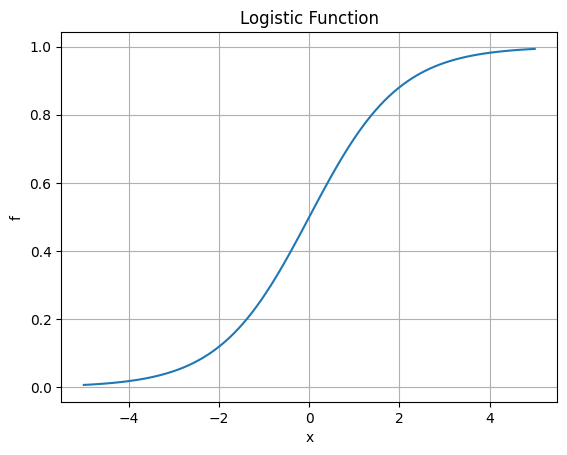

In [ ]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f')
plt.title('Logistic Function')
plt.grid(True)

# Exercise

In [ ]:
# Solution
import numpy as np
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
print(x_train)
print(y_train)

[1 2 3]
[2 3 6]


In [ ]:
x_train.shape

(3,)

In [ ]:
x_train = x_train.reshape(3,1)
print(x_train.shape)
x_train

(3, 1)


array([[1],
       [2],
       [3]])

(3, 1) (3,)


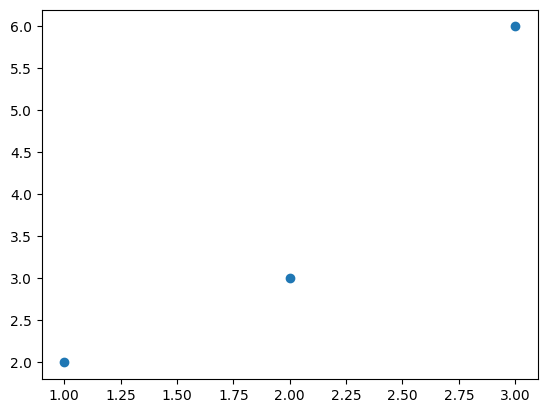

In [ ]:
# %load solution/simple_scatterplot.py
# Make a simple scatterplot
plt.scatter(x_train,y_train)
#check dimmension
print(x_train.shape,y_train.shape)

<Axes: title={'center': 'hello nice plot'}, xlabel='$x$', ylabel='$y$'>

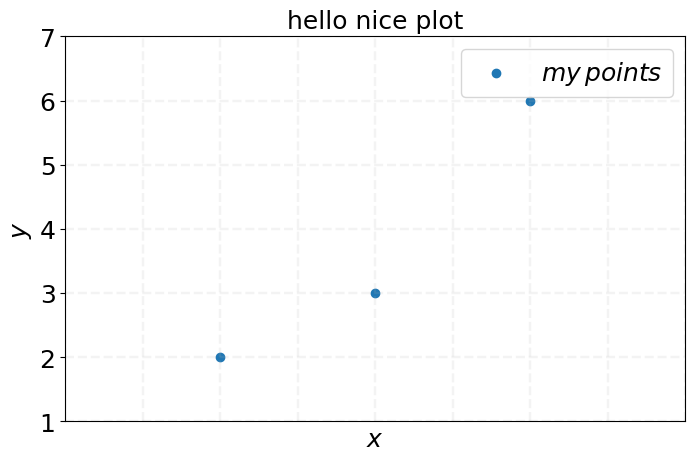

In [ ]:
# %load solutions/nice_scatterplot.py
def nice_scatterplot(x, y, title):
    # font size
    f_size = 18

    # make the figure
    fig, ax = plt.subplots(1,1, figsize=(8,5)) # Create figure object

    # set axes limits to make the scale nice
    ax.set_xlim(np.min(x)-1, np.max(x) + 1)
    ax.set_ylim(np.min(y)-1, np.max(y) + 1)

    # adjust size of tickmarks in axes
    ax.tick_params(labelsize = f_size)

    # remove tick labels
    ax.tick_params(labelbottom=False,  bottom=False)

    # adjust size of axis label
    ax.set_xlabel(r'$x$', fontsize = f_size)
    ax.set_ylabel(r'$y$', fontsize = f_size)

    # set figure title label
    ax.set_title(title, fontsize = f_size)

    # you may set up grid with this
    ax.grid(True, lw=1.75, ls='--', alpha=0.15)

    # make actual plot (Notice the label argument!)
    #ax.scatter(x, y, label=r'$my points$')
    #ax.scatter(x, y, label='$my points$')
    ax.scatter(x, y, label=r'$my\,points$')
    ax.legend(loc='best', fontsize = f_size);

    return ax

nice_scatterplot(x_train, y_train, 'hello nice plot')

In [ ]:
# Make a model from scratch
#solution
xx = np.array([[1,2,3],[4,6,8]])
xxx = xx.reshape(-1,2)
print(xxx.shape)
print(xxx.ndim)
xxx

(3, 2)
2


array([[1, 2],
       [3, 4],
       [6, 8]])

In [ ]:
# Reshape to be a proper 2D array
x_train = x_train.reshape(x_train.shape[0], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

print(x_train.shape)
print(x_train)

(3, 1)
[[1]
 [2]
 [3]]


In [ ]:
# first, compute means
y_bar = np.mean(y_train)
x_bar = np.mean(x_train)

# build the two terms
numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
denominator = np.sum((x_train - x_bar)**2)

print(numerator.shape, denominator.shape) #check shapes

() ()


In [ ]:
#slope beta1
beta_1 = numerator/denominator

#intercept beta0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))
print(f'The best fit is {beta_0}')

The best-fit line is -0.33 + 2.00 * x
The best fit is -0.3333333333333335


In [ ]:
# %load solutions/simple_linear_regression_fit.py
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """

    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)

    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])

In [ ]:
x_train = np.array([1 ,2, 3])
y_train = np.array([2, 2, 4])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

Reshaping features array.
Reshaping observations array.
The best-fit line is 0.666667 + 1.000000 * x


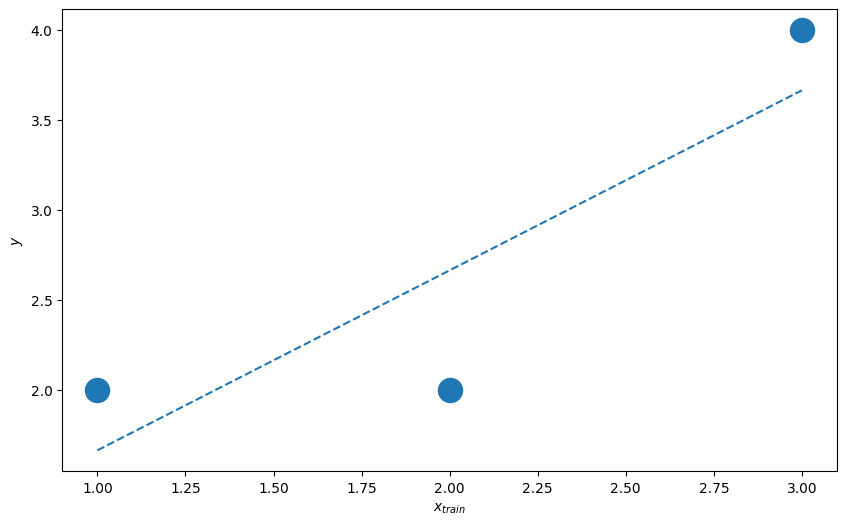

In [ ]:
# %load solutions/best_fit_scatterplot.py
fig_scat, ax_scat = plt.subplots(1,1, figsize=(10,6))

# Plot best-fit line
x_train = np.array([[1, 2, 3]]).T

best_fit = beta_0 + beta_1 * x_train

ax_scat.scatter(x_train, y_train, s=300, label='Training Data')
ax_scat.plot(x_train, best_fit, ls='--', label='Best Fit Line')

ax_scat.set_xlabel(r'$x_{train}$')
ax_scat.set_ylabel(r'$y$');

## k-nearest neighbors

In [ ]:
# Import the library
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Set number of neighbors
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [ ]:
# Fit the regressor - make sure your numpy arrays are the right shape
knnreg.fit(x_train, y_train)

# Evaluate the outcome on the train set using R^2
r2_train = knnreg.score(x_train, y_train)

# Print results
print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')

ValueError: ignored